K is equal to 3

len compl 8
8
K is equal to 5

len compl 8
8
K is equal to 7

len compl 8
8
K is equal to 9

len compl 8
8


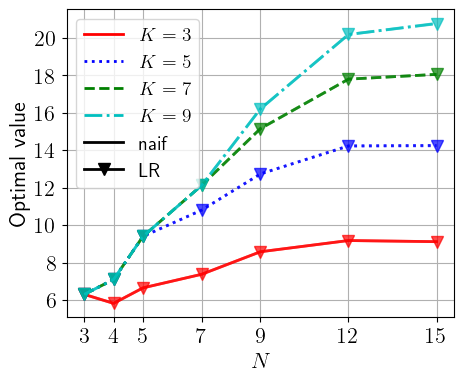

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug  1 22:54:36 2021

@author: paulz
"""

import numpy as np
import pandas as pd
from numpy import loadtxt
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.signal import savgol_filter
font_size = 16
marker_size = 8

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})

args = {'K': 3, #3, 5,8
        'diff': 4, #4, 2,1
        'method': "BL", #"BL" "uni", "WF", "WR".
        'ep':20
        }

def give_filename(args):
    Sl = 2.1- args['diff']/2
    Su = 2.1 + args['diff']/2
    K = args['K']
    file_name = ''
    # file_name = 'python_res/res_K{}_{:.1f}_{:.1f}.npy'.format(K, Sl,Su)
    file_name_compl = 'python_res/res_K{}_{:.1f}_{:.1f}_compl3.npy'.format(K, Sl,Su)
    
    return file_name, file_name_compl

def give_data(args):
    pre_file_name,pre_compl = give_filename(args)
    print(pre_file_name)
    # with open(pre_file_name, 'rb') as f:
    #     res_WFmat = np.load(f)
    #     res_WF= np.mean(res_WFmat , axis= 0)
    #     time_WF_m = np.load(f)
    #     time_WF= np.mean(time_WF_m , axis= 0)
    #     res_Tmat = np.load(f)
    #     res_T = np.mean(res_Tmat , axis= 0)
    #     time_T_m = np.load(f)
    #     time_T = np.mean(res_Tmat , axis= 0)
    if os.path.isfile(pre_compl):
        with open(pre_compl, 'rb') as f:
            res_WFmat = np.load(f)
            res_WFc= np.mean(res_WFmat , axis= 0)
            time_WF_m = np.load(f)
            time_WFc= np.mean(time_WF_m , axis= 0)
            res_WFmat_fast = np.load(f)
            res_WFc_fast= np.mean(res_WFmat_fast , axis= 0)
            time_WF_m_fast = np.load(f)
            time_WFc_fast= np.mean(time_WF_m_fast , axis= 0)
            res_Tmat = np.load(f)
            res_Tc = np.mean(res_Tmat , axis= 0)
            time_T_m = np.load(f)
            time_Tc = np.mean(res_Tmat , axis= 0)
            print("len compl", len(res_WFc))
        # res_WF = np.concatenate((res_WFc, res_WF[4:]))
        # time_WF = np.concatenate((time_WFc, time_WF[4:]))
        # res_T = np.concatenate((res_Tc, res_T[4:]))
        # time_T = np.concatenate((time_Tc, time_T[4:]))
        res_LR = res_WFc
        time_LR = time_WFc
        res_WF_fast = res_WFc_fast
        time_WF_fast = time_WFc_fast
        res_T = res_Tc
        time_T = time_Tc
    else:
        print("no data for ", pre_compl)
    return res_LR, time_LR ,res_WF_fast, time_WF_fast, res_T, time_T
def give_Nvec(vec):
    if len(vec) == 4:
        Nvec = [3, 5,7, 10]
    if len(vec) == 8:
        Nvec = [3,4, 5,7,9, 10,12,15]
    if len(vec) == 9:
        # Nvec = [3,4, 5,7,8,9, 10,12,15]
        Nvec = [3,4, 5,7,9, 10,12,15,20]
    if len(vec) == 10:
        Nvec = [3,4, 5,7,8,9, 10,12,15,20]
    else:
        print(len(vec))
    return Nvec
def give_full_label_name(K, diff):
    variance =1/12* diff**2
    str_name = "K={} variance={:.1f}".format(K, variance)
    return str_name

#%% Comparison optimal value
# f = plt.figure(figsize=[20,20])
fig = plt.figure(figsize=[5,4])
ax = fig.add_subplot(111)
colors = ['r', 'b', 'g', 'c','m', 'y', 'k']
markers = ['o', 'p','x','v']
line_style = ['solid', 'dotted', 'dashed', 'dashdot']
id_color = 0

window_size = 51 # 51, 81
nb_ite_div100= 5

for id_K, K in enumerate([3,5,7,9]): #[3,5,7,10]:[2,3,4,5,6,7,8,9,10]
    args['K'] = K
    print(f"K is equal to {K}")
    for diff in [2]:
        args['diff'] = diff
        res_WF, time_WF, res_WF_f, time_WF_f,  res_T, time_T = give_data(args)
        Nvec = give_Nvec(res_WF)
        
        Nvec = np.array(Nvec[0:8])
        # 
        res_WF, res_WF_f,  res_T = res_WF[0:8], res_WF_f[0:8],  res_T[0:8]
        res_WF, res_WF_f,  res_T = res_WF[Nvec != 10], res_WF_f[Nvec != 10],  res_T[Nvec != 10]
        Nvec = Nvec[Nvec != 10]
#        acc_pd= pd.Series(acc)
#        acc_smooth = acc_pd.rolling(window_size).mean()
#        acc_std = acc_pd.rolling(window_size).std()
        # acc_smooth = savgol_filter(vec_avg_dict[key], 21, 3)
        plt.plot(Nvec,np.asarray(res_WF), linewidth = 2.0, linestyle = line_style[id_K],
                 label=give_full_label_name(K, diff)+" WF", color = colors[id_K], alpha=0.7, 
                 marker= 'v', markersize =marker_size)
        # plt.plot(Nvec,np.asarray(res_WF_f), linewidth = 2.0, linestyle = line_style[id_K],
        #          label=give_full_label_name(K, diff)+" WF_fast", marker = '^', markersize = marker_size,color = colors[id_K], alpha=0.7)
        plt.plot(Nvec,np.asarray(res_T), linewidth = 2.0,linestyle = line_style[id_K],
                 label=give_full_label_name(K, diff)+" naif", color = colors[id_K], alpha=0.7)

plt.xlabel("$N$",fontsize=font_size)
plt.ylabel("Optimal value",fontsize=font_size)
#plt.legend()


legend_elements = [Line2D([0], [0], color=colors[0],linestyle = line_style[0], lw=2, label='$K = 3$'),
                   Line2D([0], [0], color=colors[1],linestyle = line_style[1], lw=2, label='$K = 5$'),
                   Line2D([0], [0], color=colors[2],linestyle = line_style[2], lw=2, label='$K = 7$'),
                   Line2D([0], [0], color=colors[3],linestyle = line_style[3], lw=2, label='$K = 9$'),
                   # Line2D([0], [0], color='k', lw=4, linestyle = line_style[0], label=f"length interval {1}"),
                   # Line2D([0], [0], color='k', lw=4, linestyle = line_style[1], label=f"length interval {2}"),
                   # Line2D([0], [0], color='k', lw=4, linestyle = line_style[2], label=f"length interval {4}"),
                   Line2D([0], [0], color='k', lw=2, linestyle = line_style[0], label='naif'),
                   Line2D([0], [0], color='k', lw=2, linestyle = line_style[0], marker = 'v', markersize = marker_size, label='LR')#,
                   # Line2D([0], [0], color='k', lw=2, linestyle = line_style[1], marker = '^', markersize = marker_size, label='WF fast')
                  ]
plt.legend(handles=legend_elements, prop={'size': font_size-2})
plt.xticks(Nvec,fontsize = font_size)
plt.yticks( fontsize = font_size)
plt.grid()
# plt.title("Fed"+args['opt'] + " "+args['iid']+" alpha = 0.5", fontsize =font_size)
#plt.title(args['iid'], fontsize =font_size)

#ax.tick_params(color='#dddddd')
#ax.spines['bottom'].set_color('#dddddd')
#ax.spines['top'].set_color('#dddddd') 
#ax.spines['right'].set_color('#dddddd')
#ax.spines['left'].set_color('#dddddd')
# plt.tight_layout()
# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# # figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
plt.savefig("./figures2/comp_WF_new_2.pdf", bbox_inches="tight")
plt.show()



In [ ]:
Nvec[Nvec!=10]

In [ ]:
res_WF_f
# res_WF

8

len compl 8

len compl 8

len compl 8

len compl 8


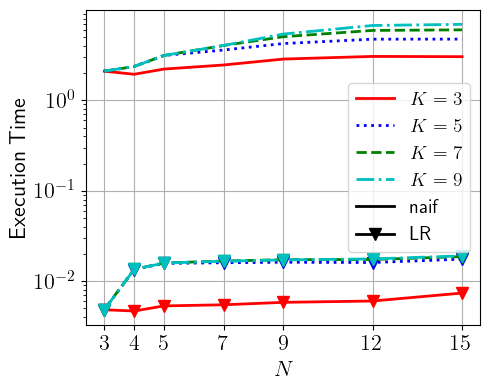

In [9]:
#%% Comparison execution time
# f = plt.figure(figsize=[20,20])
def regroup_K(K):
    args['K'] = K
    t_WF = np.zeros(8)
    t_WF_f = np.zeros(8)
    t_T = np.zeros(8)
    for diff in [2]:
        args['diff'] = diff
        _, time_WF,_, time_WF_f, _, time_T = give_data(args)
        if len(time_WF) == 9:
            time_WF = np.delete(time_WF, 4)
            time_T = np.delete(time_T, 4)
        t_WF += time_WF[0:8]
        t_WF_f += time_WF_f[0:8]
        t_T += time_T[0:8]
    t_WF = t_WF / 3
    t_WF_f = t_WF_f/3
    t_T = t_T / 3
    return t_WF,t_WF_f, t_T
fig = plt.figure(figsize=[5,4])
ax = fig.add_subplot(111)
# colors = ['r', 'b', 'g', 'c','m', 'y', 'k']
# markers = ['o', 'p','x','None']
# line_style = ['-', ':', '-.']
# font_size = 28
window_size = 51 # 51, 81
nb_ite_div100= 5
Nvec = give_Nvec(time_WF)
Nvec = np.array(Nvec)
for id_K, K in enumerate([3,5,7,9]):
    args['K'] = K
    id_style = 0
    t_WF, t_WF_f, t_T = regroup_K(K)
    t_WF,t_WF_f, t_T = t_WF[0:8], t_WF_f[0:8],t_T[0:8]
    t_WF,t_WF_f, t_T = t_WF[Nvec!=10], t_WF_f[Nvec!=10],t_T[Nvec!=10]
    plt.plot(Nvec[Nvec!=10],np.asarray(t_WF), linewidth = 2.0, linestyle = line_style[id_K],
             marker='v', markersize = marker_size, label='K={} WF'.format(K), color = colors[id_K])
    # plt.plot(Nvec,np.asarray(t_WF_f), linewidth = 2.0, linestyle = line_style[1],
    #          marker='^', markersize = marker_size, label='K={} WF'.format(K), color = colors[id_K])
    plt.plot(Nvec[Nvec!=10],np.asarray(t_T), linewidth = 2.0,linestyle = line_style[id_K],
             label='K={} naif'.format(K), color = colors[id_K])
    id_style +=1
    id_color += 1

plt.xlabel("$N$",fontsize=font_size)
plt.ylabel("Execution Time",fontsize=font_size)
#plt.legend()
legend_elements = [Line2D([0], [0], color=colors[0],linestyle = line_style[0], lw=2, label='$K = 3$'),
                   Line2D([0], [0], color=colors[1],linestyle = line_style[1], lw=2, label='$K = 5$'),
                   Line2D([0], [0], color=colors[2],linestyle = line_style[2], lw=2, label='$K = 7$'),
                   Line2D([0], [0], color=colors[3],linestyle = line_style[3], lw=2, label='$K = 9$'),
                   # Line2D([0], [0], color='k', lw=4, linestyle = line_style[0], label=f"length interval {1}"),
                   # Line2D([0], [0], color='k', lw=4, linestyle = line_style[1], label=f"length interval {2}"),
                   # Line2D([0], [0], color='k', lw=4, linestyle = line_style[2], label=f"length interval {4}"),
                   Line2D([0], [0], color='k', lw=2, linestyle = line_style[0], label='naif'),
                   Line2D([0], [0], color='k', lw=2, linestyle = line_style[0], marker = 'v', markersize = marker_size, label='LR')#,
                   # Line2D([0], [0], color='k', lw=2, linestyle = line_style[1], marker = '^', markersize = marker_size, label='WF fast')
                  ]
plt.legend(handles=legend_elements, prop={'size': font_size-2})
# plt.legend(loc=2,prop={'size': 15})
plt.xticks(Nvec[Nvec!=10],fontsize = font_size)
plt.yticks( fontsize = font_size)
# plt.xlim([0,15])
plt.yscale("log")
plt.grid()
# plt.title("Fed"+args['opt'] + " "+args['iid']+" alpha = 0.5", fontsize =font_size)
#plt.title(args['iid'], fontsize =font_size)

#ax.tick_params(color='#dddddd')
#ax.spines['bottom'].set_color('#dddddd')
#ax.spines['top'].set_color('#dddddd') 
#ax.spines['right'].set_color('#dddddd')
#ax.spines['left'].set_color('#dddddd')
plt.tight_layout()
# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# # figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
plt.savefig("./figures2/comp_time_new_2.pdf", bbox_inches="tight")
plt.show()

# Test evaluate solve opti why infinity values. 

In [ ]:

import time
import numpy as np


from selections.function_waterfilling3 import opti_WF as opti_WF_old
from selections.function_waterfilling5 import opti_WF
from selections.function_user_selection import user_selection_opti
from selections.function_user_selection_allCombinations import choose_comb, solve_opti_all, solve_opti_wrt_P
import argparse

# %%




In [ ]:
N = 10
K = 3
wireless_arg = {
    'radius': 1000,
    'ampli': 15,
    'N0': dB2power(-150),
    'B': 1e6,
    'm': dB2power(0.023),
    'M': 16,
    'Mprime': 15,
    'E_max': 60,  # mJ
    'Tslot': 1.3,
    'sigma': 1,  # 1
    'freq': 2400,  # Mhz
    'P_max': 10,  # mW
    'alpha': 0.1,
    'beta': 0.001,
    'kappa':10**(-28),
    'freq_comp': 2*10**9,
    'C': 2*10**4
}
P_max = wireless_arg['P_max']
E_max = wireless_arg['E_max']
T = wireless_arg['Tslot']
P_sum = E_max / T

const_alpha = wireless_arg['N0'] * wireless_arg['B'] / wireless_arg['m']

In [ ]:
plt.figure()
plt.plot(np.array([0,3,5,6]))
plt.show()

In [ ]:
plt.hist(np.random.power(4, 1000))
plt.show()